# Regression (강재영)

## 규제

#### - 회귀 모델에서 모델에 규제를 가함으로 과대적합을 방지할 수 있다.
#### - 선형회귀모델에서는 릿지, 라쏘, 엘라스틱넷 회귀를 통해 모델의 가중치를 제한한다.

### - 규제가 있는 선형 회귀 모델의 필요성

#### 과분산 모델에 대해 모델을 규제하면 오버피팅↓
#### *규제 = 오버피팅된 파라미터 값에 대해 페널티를 부여하는 것
#### *페널티: 없는 회귀 모델보다 계수의 절댓값↓ → 오버피팅 방지
#### + 편향 ↑ (규제가 없는 회귀 모델보다 훈련 데이터와 적합도 ↓. But 전체적인 결과 Good.)
#### 주의: 오버피팅된 모델은 지나친 노이즈를 반영할 수 있으므로 모델을 단순화하여 좀 더 일반화된 모델로 만들 필요가 있음.



## 릿지 회귀(Ridge Regression)

### - 주요 생성 파라미터: alpha (α). -> 모델 규제를 조절함.
#### α =0 -> 선형회귀와 동일.
#### α가 매우 클 시 -> 모든 가중치가 0에 가까워져 데이터의 평균을 지나는 수평선이 됨.


#### 가중치 벡터의 제곱항을 합한 L2 노름의 절반 값을 적용.
#### 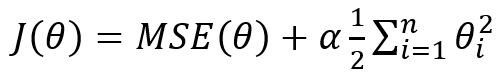
#### 모델의 가중치가 가능한 작게 유지되도록 함.
#### 규제항은 훈련하는 동안에만 비용함수에 추가됨.
#### 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가.



## 라쏘 회귀(Lasso Regression)

#### 가중치 벡터의 절댓값의 합인 L1 노름을 적용.
#### 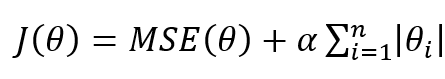
#### 불필요한 회귀 계수를 가중치(0)를 완전히 제거하려고 함.
#### 차수가 높은 다항 특징의 가중치를 0으로 만듦.
#### 자동으로 변수를 선택하고 희소모델(sparse model)을 만듦. (0이 아닌 변수의 가중치가 적음)


## 엘라스틱 넷(Elastic Net)

### - 릿지 회귀와 라쏘 회귀의 절충 모델.
### - 규제항은 릿지와 회귀의 규제항을 단순히 결합하여 사용하며, 두 규제 항의 혼합정도를 혼합비율 r을 사용해 조절.
#### r=0 -> 릿지 회귀
#### r=1 -> 라쏘 회귀


### --- 보스턴 주택 가격 데이터 셋 사용 ---

In [1]:
from sklearn.datasets import load_boston

import numpy as np
import pandas as pd

import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Discription 출력
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
#Data의 x변수
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
#Data의 y변수
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [5]:
#Data 변수명
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
#Data 규격
boston.data.shape

(506, 13)

In [7]:
#DataFrame 형태로 변환
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['MEDV'])

In [8]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [9]:
#상위 5개의 X만 출력
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
#상위 5개의 y만 출력
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [11]:
#Train set/Test set 나누기 test
#test size: 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

In [12]:
#선형회귀 모델 가정 확인
#beta0가 구성될 수 있도록 1로 구성된 벡터를 추가하는 과정
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train, axis=1)
model_trained = model.fit()

C:\Users\tom11\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


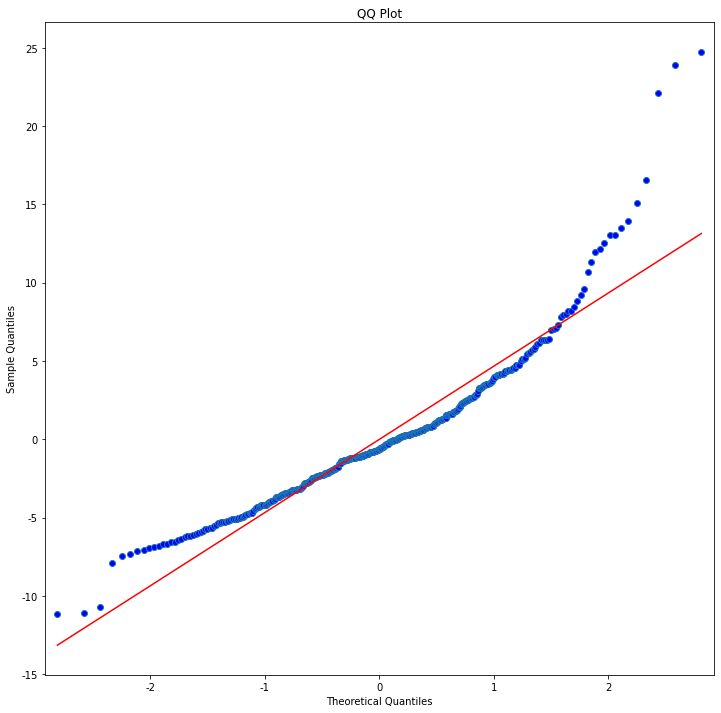

In [13]:
#확률오차의 정규성 확인
model_residuals = model_trained.resid

plt.rcParams['axes.unicode_minus'] = False #음수 폰트 깨짐 방지
fig,ax = plt.subplots(1,1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color = '#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')

C:\Users\tom11\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Fittered values'), Text(0, 0.5, 'Residuals')]

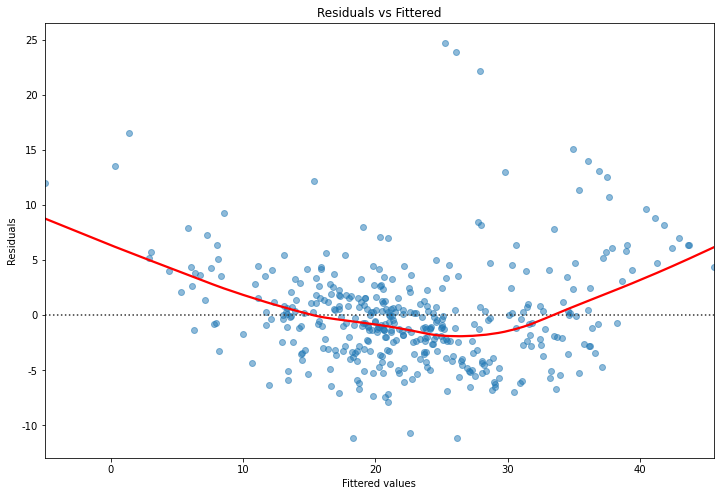

In [14]:
#확률오차의 등분산성 확인
model_fitted_y = model_trained.fittedvalues

fig, ax = plt.subplots(1,1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(model_fitted_y, y_train, data=X_train, lowess=True, scatter_kws={'alpha':0.5},
             line_kws={'color':'red'}, ax=ax)

ax.title.set_text('Residuals vs Fittered')
ax.set(xlabel='Fittered values', ylabel='Residuals')

In [15]:
#구축한 모델의 summary 값 출력
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     93.01
Date:                Fri, 13 Aug 2021   Prob (F-statistic):          1.02e-110
Time:                        04:49:52   Log-Likelihood:                -1196.3
No. Observations:                 404   AIC:                             2421.
Df Residuals:                     390   BIC:                             2477.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.0744      5.844      6.002      0.0

In [16]:
#INDUS와 AGE 변수의 P-value값이 다른 것들과 다르게 비정상적으로 높음을 알 수 있음
#INDUS, AGE 제거
model = sm.OLS(y_train, X_train.drop(['INDUS', 'AGE'], axis=1))
model_trained = model.fit()

print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     110.3
Date:                Fri, 13 Aug 2021   Prob (F-statistic):          1.19e-112
Time:                        04:49:52   Log-Likelihood:                -1196.5
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     392   BIC:                             2465.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.6295      5.783      5.988      0.0

### 릿지 회귀

In [17]:
X_data = X_train[['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']]

In [18]:
y_target = y_train[['MEDV']]

In [19]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

#alpha=10으로 설정하여 릿지 회귀 수행
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [20]:
print('5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores,3))
print('5 folds 의 개별 RMSE scores: ', np.round(rmse_scores,3))
print('5 folds 의 평균 RMSE: {0: 3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores:  [-18.32  -23.07  -30.404 -34.561 -16.246]
5 folds 의 개별 RMSE scores:  [4.28  4.803 5.514 5.879 4.031]
5 folds 의 평균 RMSE:  4.901351


In [21]:
#릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas : 
    ridge = Ridge(alpha = alpha)
    
     #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0} 일때 5 folds 의 평균 RMSE: {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일때 5 folds 의 평균 RMSE: 4.801
alpha 0.1 일때 5 folds 의 평균 RMSE: 4.802
alpha 1 일때 5 folds 의 평균 RMSE: 4.829
alpha 10 일때 5 folds 의 평균 RMSE: 4.901
alpha 100 일때 5 folds 의 평균 RMSE: 5.057


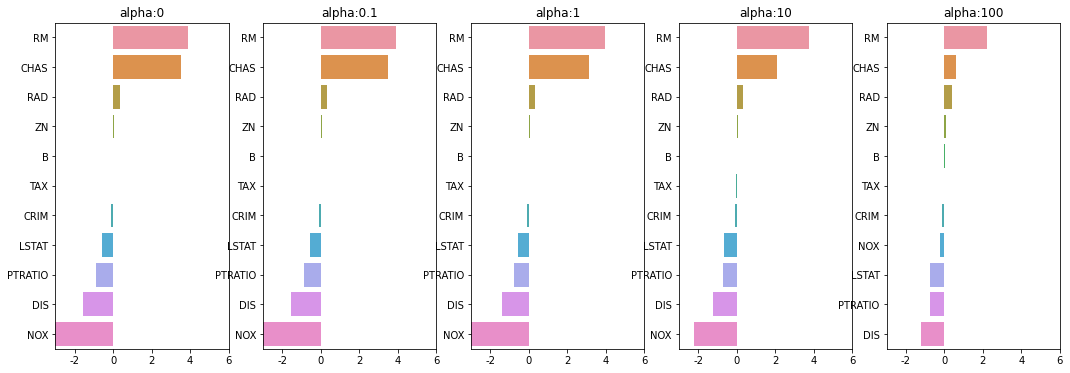

In [22]:
#각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)

#각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

#alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    #alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가.
    coeff = pd.Series(data=ridge.coef_.flatten(), index=X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    #막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수 값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
#for문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [23]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.901894,3.912945,3.959673,3.771087,2.224547
CHAS,3.537445,3.483587,3.153787,2.106509,0.597113
RAD,0.335401,0.334595,0.330740,0.334111,0.372536
ZN,0.052179,0.052592,0.054876,0.059193,0.064103
B,0.009677,0.009756,0.010175,0.010634,0.009799
TAX,-0.011779,-0.012020,-0.013333,-0.015457,-0.017358
CRIM,-0.114938,-0.114148,-0.109961,-0.105234,-0.105290
LSTAT,-0.562419,-0.566018,-0.586375,-0.632645,-0.735444
PTRATIO,-0.870833,-0.858159,-0.791002,-0.716852,-0.756977
DIS,-1.584529,-1.557078,-1.410629,-1.230723,-1.201253


### 라쏘 회귀

In [24]:
from sklearn. linear_model import Lasso, ElasticNet

In [25]:
#alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수 값들을 DataFrame으로 변환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('#######', model_name, '#######')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n,
                                        scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0} 일 때 5 폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
        
        #cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data, y_target)
        
        #alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df
#end of get_linear_regre_eval

In [26]:
#라쏘에 사용될 alpha 파라미터 값을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

####### Lasso #######
alpha 0.07 일 때 5 폴드 세트의 평균 RMSE: 4.933
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE: 4.943
alpha 0.5 일 때 5 폴드 세트의 평균 RMSE: 5.019
alpha 1 일 때 5 폴드 세트의 평균 RMSE: 5.262
alpha 3 일 때 5 폴드 세트의 평균 RMSE: 6.026


In [27]:
#반환된 coeff_lasso_df를 첫 번째 칼럼 순으로 내림차순 정렬해 회귀 계수 DataFrame 츨력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.931070,3.845716,2.658220,1.159631,0.000000
CHAS,1.751580,1.250444,0.000000,0.000000,0.000000
RAD,0.323527,0.324928,0.320830,0.309148,0.136134
ZN,0.058531,0.058554,0.057915,0.056843,0.023818
B,0.010876,0.010848,0.009966,0.008717,0.006896
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
TAX,-0.015566,-0.015586,-0.015485,-0.015252,-0.008456
CRIM,-0.101802,-0.101716,-0.091435,-0.075956,-0.008520
LSTAT,-0.631444,-0.638465,-0.707266,-0.786128,-0.800143
PTRATIO,-0.678491,-0.684671,-0.672267,-0.629477,-0.273251


### 엘라스틱넷

In [28]:
#엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
#l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

####### ElasticNet #######
alpha 0.07 일 때 5 폴드 세트의 평균 RMSE: 4.926
alpha 0.1 일 때 5 폴드 세트의 평균 RMSE: 4.940
alpha 0.5 일 때 5 폴드 세트의 평균 RMSE: 5.076
alpha 1 일 때 5 폴드 세트의 평균 RMSE: 5.257
alpha 3 일 때 5 폴드 세트의 평균 RMSE: 5.804


In [29]:
#반환된 coeff_elastic_df를 첫 번째 칼럼 순으로 내림차순 정렬해 회귀 계수 DataFrame 출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.707684,3.551124,2.041451,1.046051,0.000000
CHAS,1.563542,1.168854,0.000000,0.000000,0.000000
RAD,0.332068,0.335190,0.347655,0.333840,0.211624
ZN,0.059596,0.060175,0.061152,0.057903,0.038192
B,0.010722,0.010668,0.009597,0.008729,0.007348
TAX,-0.015785,-0.016002,-0.016511,-0.016048,-0.011686
CRIM,-0.103209,-0.102867,-0.095648,-0.083677,-0.038035
NOX,-0.452226,-0.000000,-0.000000,-0.000000,0.000000
LSTAT,-0.644522,-0.657036,-0.744428,-0.790930,-0.800635
PTRATIO,-0.698383,-0.700953,-0.711982,-0.664934,-0.382721


## 정리
#### ·선형 회귀 모델의 성능을 측정하는 평가 지표로 RMSE를 사용할 수 있다.
#### ·과분산 선형 회귀 모델에 대해 규제를 적용하면 오버피팅 이슈를 감소시킬 수 있다. 
#### ·릿지 회귀 모델은 규제가 있는 선형 회귀 모델로, 가중치 벡터의 제곱항을 합한 L2 노름을 2로 나눈 값을 적용한다.
#### ·라쏘 회귀 모델은 규제가 있는 선형 회귀 모델로, 가중치 벡터의 절댓값의 합인 L1 노름을 적용한다.
#### ·엘라스틱 넷 모델은 릿지 회귀 모델과 라쏘 회귀 모델을 혼합하여 사용한다.
